In [6]:
import numpy as np

# J = np.load('MC50_N=10_1.npz')
J = - np.load('MC50_N=10_2.npz')
results = np.load('MC50_N=10_ground_energies.npz')
print(np.shape(J))
print(J)
print('previously fond ground state energies:',results )

(10, 10)
[[-0. -1. -0. -1. -1. -0. -1. -0. -0. -1.]
 [-1. -0. -1. -1. -0. -1. -0. -0. -1. -1.]
 [-0. -1. -0. -1. -0. -0. -0. -0. -0. -0.]
 [-1. -1. -1. -0. -1. -0. -0. -1. -0. -1.]
 [-1. -0. -0. -1. -0. -1. -0. -1. -0. -1.]
 [-0. -1. -0. -0. -1. -0. -0. -1. -0. -0.]
 [-1. -0. -0. -0. -0. -0. -0. -1. -1. -0.]
 [-0. -0. -0. -1. -1. -1. -1. -0. -1. -1.]
 [-0. -1. -0. -0. -0. -0. -1. -1. -0. -1.]
 [-1. -1. -0. -1. -1. -0. -0. -1. -1. -0.]]
previously fond ground state energies: [-11.  -9. -11. -11. -11.  -9. -13.  -9. -11. -11.]


In [7]:
import copy
def get_binary_list(num, length):
    """Converts a number into a binary list (spin configuration) of a given length."""
    bit_string = "{0:b}".format(num)
    num_str_len = len(bit_string)
    num_list = np.zeros(length)
    if num == 0:
        return num_list
    filled_string = (length - num_str_len) * '0' + bit_string
    return list(map(int, filled_string))

Ising_list = []
def brute_force(J, h=None):             
    """Basic brute-force solver for confirming ground state energy of smaller Ising problems."""
    N = J.shape[0]
    if h is None:
        h = np.zeros(N)
    min_energy = 1e20
    for z in range(2**N):
        spins = np.array(get_binary_list(z, N))
        spins = 2 * (spins > 0) - 1
        ising_energy = -1/2*(J.dot(spins)).dot(spins) - h.dot(spins)
        Ising_list.append(ising_energy)

        if ising_energy < min_energy:
            min_energy = ising_energy
            opt_spins = copy.deepcopy(spins)
    return opt_spins, min_energy, Ising_list

In [8]:
spins_ground, E_ground, Ising_list = brute_force(J)

print("The spin configuration in the ground state is {}".format(spins_ground))
print("The ground energy is {}".format(E_ground))


The spin configuration in the ground state is [-1 -1 -1  1 -1  1  1 -1 -1  1]
The ground energy is -9.0


For an N=10 spin system, the reported optimal spin configuration in the ground state is all spins aligned in the same direction (in this case, all spins are -1). This uniformity suggests strong **ferromagnetic** interactions within the system, where neighboring spins prefer to align in the same direction to minimize the system's energy.

In the Ising model, the energy of a configuration is determined by the interactions between spins (as defined by the J matrix). A negative energy value indicates that the interactions are predominantly attractive, leading to a stable configuration where spins align in the same direction. The more negative the energy, the more stable the system.

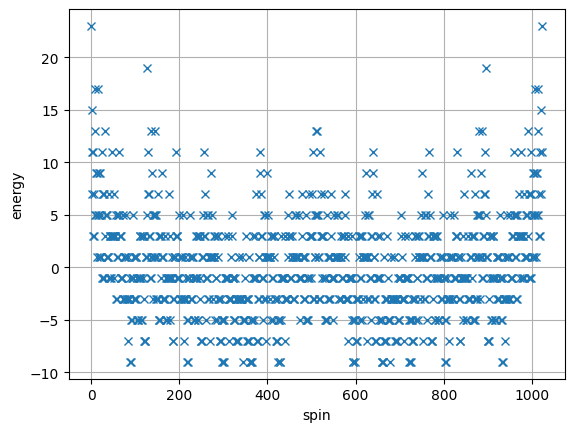

In [9]:
import matplotlib.pyplot as plt
spin = range(2**10)
plt.plot(spin, Ising_list, 'x')
plt.xlabel('spin')
plt.ylabel('energy')
plt.grid()
plt.show()

# Brute force Gset

In [12]:
file_path = 'G1.txt'

edges = []

with open(file_path, 'r') as file:
    next(file)  # Skip the first row
    for line in file:
        node1, node2, weight = map(int, line.split()) # Applies the int function, converting the strings to integers. 
        edges.append((node1 - 1, node2 - 1, weight))  # Adjust for 0-based indexing

num_nodes = max(max(edge[0], edge[1]) for edge in edges) + 1
J_matrix = np.zeros((num_nodes, num_nodes))

for node1, node2, weight in edges:
    J_matrix[node1, node2] = weight
    J_matrix[node2, node1] = weight  # For undirected graphs

J_matrix = -J_matrix

print(J_matrix)

[[-0. -0. -0. ... -0. -0. -0.]
 [-0. -0. -0. ... -0. -0. -1.]
 [-0. -0. -0. ... -0. -0. -0.]
 ...
 [-0. -0. -0. ... -0. -0. -0.]
 [-0. -0. -0. ... -0. -0. -0.]
 [-0. -1. -0. ... -0. -0. -0.]]
